In [2]:
import pandas as pd
import json

### data cleaning Opensky

### Construire les listes des altitudes et vitesses

In [1]:
import pandas as pd
import json
import math

In [30]:
from haversine import haversine, Unit

toulouse = (43.6293, 1.3676) # (lat, lon)
paris = (48.8567, 2.3508)

haversine(toulouse, paris)

586.1437473064477

In [35]:

def haversine_distance(lat1, long1, lat2, long2):
    R = 6371  # radius of Earth in kilometers
    lat1, long1, lat2, long2 = map(math.radians, [lat1, long1, lat2, long2])
    dlat = lat2 - lat1
    dlong = long2 - long1
    a = (math.sin(dlat/2)**2) + math.cos(lat1) * math.cos(lat2) * (math.sin(dlong/2)**2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c
    return d

In [36]:
latitude_aero = 43.6293     #TOULOUSE
longitude_aero = 1.3676 
lat = 48.8567               #PARIS
long = 2.3508

distance = haversine_distance(latitude_aero, longitude_aero, lat, long)
print(distance)

586.14293769134


In [37]:

#data = pd.read_csv("output_example.csv")
data = pd.read_csv("2022-09-29.csv")
alt_list = []
lat_list = []
long_list = []
distance_aero_list = []
surf_list = []
rate_list = []
indice_list = []
flightid_list = []

latitude_aero = 43.6293
longitude_aero = 1.3676 

for i in range (len(data)) :
   icao_addr = data.icao_adress_hex[i]
   jsn = data.data[i]
   jsn2 = json.loads(jsn)
   try:
      alt = jsn2["05_Altitude (ft)"]
      long = jsn2["05_Airborne Longitude (°)"]
      lat = jsn2["05_Airborne Latitude (°)"]
      vitesse_surf = jsn2["09_Surface Speed Calculated (knots)"]
      vitesse_rate = jsn2["09_sub1_Vertical Rate_Meaning"]
      flight_id = jsn2["08_Flight_ID"]
      air_sol = jsn2["AIR_SOL"]
      if (air_sol == 'SOL') : 
         indice_list.append(icao_addr)

      #calcul de la distance
      #distance = haversine_distance(latitude_aero, longitude_aero, lat, long)
      distance = haversine_distance(latitude_aero, longitude_aero, lat, long)
      

      if (vitesse_rate == "ZERO") : 
         rate_list.append(0)
      else :
         vitesse_split = vitesse_rate.split()
         if (vitesse_split[0] == "-") : 
            rate_list.append(-int(vitesse_split[1]))
         else : 
            rate_list.append(int(vitesse_split[1]))


      alt_list.append(alt)
      long_list.append(long)
      lat_list.append(lat)
      distance_aero_list.append(distance)
      surf_list.append(int(vitesse_surf))
      flightid_list.append(flight_id)
      
   except:
      print("erreur")
      alt_list.append(-100)
      long_list.append(-100)
      lat_list.append(-100)
      surf_list.append(-100)
      rate_list.append(-100)
      distance_aero_list.append(-100)
      flightid_list.append("")     # A verifier


data.loc[:, 'altitude'] = alt_list
data.loc[:, 'longitude'] = long_list
data.loc[:, 'latitude'] = lat_list
data.loc[:, 'distance_aero'] = distance_aero_list
data.loc[:, 'TAS'] = surf_list
data.loc[:, 'vertical_rate'] = rate_list
data.loc[:, 'Flight_ID'] = flightid_list



data.drop(data[data['altitude']==-100].index,  inplace = True)
data = data.dropna(subset=['longitude','latitude'])

data

erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur
erreur

,icao_adress_hex,timestamp_s,data,altitude,longitude,latitude,distance_aero,TAS,vertical_rate,Flight_ID
0,341646,1664388774,"{""05_Airborne Latitude (°)"":44.06721496582031,...",35025,-1.107831,44.067215,204.383921,430,-64,IBE3445
1,344691,1664388774,"{""05_Airborne Latitude (°)"":43.05043883242849,...",34700,1.402261,43.050439,64.427430,432,960,VLG87TK
5,3c48e8,1664388774,"{""05_Airborne Latitude (°)"":44.09642106395657,...",38000,1.250937,44.096421,52.776851,430,0,EWG9LP
6,3cd43c,1664388774,"{""05_Airborne Latitude (°)"":43.77250671386719,...",38000,1.365371,43.772507,15.924869,425,-64,HHN910
7,440170,1664388774,"{""05_Airborne Latitude (°)"":44.1409715555482,""...",19125,1.191755,44.140972,58.614560,359,1792,EJU135H
...,...,...,...,...,...,...,...,...,...,...
1376878,4ca9c2,1664323439,"{""05_Airborne Latitude (°)"":42.747802734375,""0...",39000,-1.693705,42.747803,266.821719,400,0,RYR1988
1376879,0a0097,1664323438,"{""05_Airborne Latitude (°)"":45.608530852754235...",40000,1.171349,45.608531,220.627677,392,0,7TVNM
1376880,344290,1664323438,"{""05_Airborne Latitude (°)"":41.872993081302965...",34000,-1.081259,41.872993,279.475052,429,0,ORO902
1376881,4ca702,1664323438,"{""05_Airborne Latitude (°)"":43.64776611328125,...",37000,0.156427,43.647766,97.487025,402,0,RYR7UU


In [38]:
indice_list = [*set(indice_list)]
print(len(indice_list))
indice_list

62


['4d220a',
 '3950c9',
 '3985a9',
 '3c658c',
 '3b7b3a',
 '3b7760',
 '450121',
 '3985a4',
 '44093e',
 '3985a3',
 '38a6fb',
 '4d23d1',
 '3828fa',
 '394a65',
 '020095',
 'a9556a',
 '44ce61',
 '3950cb',
 '440037',
 '39b169',
 '8991d5',
 '4bb067',
 '4ca9d0',
 '440170',
 '398101',
 '40792f',
 '380e3a',
 '4d228f',
 '38943b',
 '4401c3',
 '400efe',
 '39e682',
 '3461cf',
 '3991e6',
 '3944f0',
 '394d49',
 '3985a2',
 '393322',
 '394c10',
 '3465c9',
 '38377a',
 '3950c6',
 '394a62',
 '393323',
 '395d67',
 '4400e9',
 '395d69',
 '02a197',
 '3b77eb',
 '3c65d4',
 '484b92',
 '347303',
 '345698',
 '389bbb',
 '393320',
 '394a63',
 '451cc1',
 '485875',
 '44ce73',
 '3452c8',
 '395d6d',
 '4ca8e6']

In [39]:
#icao_liste = data.iloc[indice_list].icao_adress_hex.drop_duplicates()
#indice_list.drop_duplicates()
data = data[ data['icao_adress_hex'].isin(indice_list) ]
data

,icao_adress_hex,timestamp_s,data,altitude,longitude,latitude,distance_aero,TAS,vertical_rate,Flight_ID
7,440170,1664388774,"{""05_Airborne Latitude (°)"":44.1409715555482,""...",19125,1.191755,44.140972,58.614560,359,1792,EJU135H
22,440170,1664388773,"{""05_Airborne Latitude (°)"":44.1409715555482,""...",19125,1.191755,44.140972,58.614560,359,1664,EJU135H
24,44093e,1664388773,"{""05_Airborne Latitude (°)"":44.26826477050781,...",18650,1.724200,44.268265,76.570241,400,-1856,EJU194C
37,440170,1664388772,"{""05_Airborne Latitude (°)"":44.13926696777344,...",19100,1.192144,44.139267,58.423127,359,1536,EJU135H
52,440170,1664388771,"{""05_Airborne Latitude (°)"":44.13752668994968,...",19075,1.192540,44.137527,58.227730,358,1472,EJU135H
...,...,...,...,...,...,...,...,...,...,...
1375629,4ca9d0,1664323701,"{""05_Airborne Latitude (°)"":43.62931590969279,...",500,1.361389,43.629316,0.499883,1,-64,RYR8XZ
1375642,4ca9d0,1664323699,"{""05_Airborne Latitude (°)"":43.62931590969279,...",500,1.361389,43.629316,0.499883,1,-64,RYR8XZ
1375649,4ca9d0,1664323698,"{""05_Airborne Latitude (°)"":43.62931590969279,...",500,1.361389,43.629316,0.499883,1,-64,RYR8XZ
1375704,4ca9d0,1664323689,"{""05_Airborne Latitude (°)"":43.62931590969279,...",500,1.361389,43.629316,0.499883,1,-64,RYR8XZ


In [40]:
data_filter = data.filter( items = ["icao_adress_hex", "Flight_ID", "timestamp_s", "altitude", "longitude", "latitude", "distance_aero", "TAS", "vertical_rate"])
data_group = data_filter.groupby(['icao_adress_hex']).agg(lambda x: x.tolist())
data_group.to_csv('data_group.csv')
len(data_group)
data_group

,Flight_ID,timestamp_s,altitude,longitude,latitude,distance_aero,TAS,vertical_rate
icao_adress_hex,,,,,,,,
020095,"[RAM792Y, RAM792Y, RAM792Y, RAM792Y, RAM792Y, ...","[1664367899, 1664367898, 1664367895, 166436789...","[37025, 37025, 37025, 37025, 37025, 37025, 370...","[-0.7567457719282515, -0.7567457719282515, -0....","[41.98164367675781, 41.98164367675781, 41.9953...","[252.1735202987829, 252.1735202987829, 250.397...","[439, 440, 440, 439, 439, 439, 439, 439, 440, ...","[-64, -64, -64, -64, -64, 0, 0, 0, 0, 0, 0, 0,..."
02a197,"[TAR282, TAR282, TAR282, TAR282, TAR282, TAR28...","[1664375476, 1664375463, 1664375462, 166437546...","[650, 650, 650, 650, 650, 650, 650, 650, 650, ...","[1.3653128487723214, 1.3653128487723214, 1.365...","[43.625498626191735, 43.625498626191735, 43.62...","[0.4610400012559232, 0.4610400012559232, 0.461...","[2, 2, 2, 3, 4, 4, 5, 5, 6, 7, 8, 8, 7, 7, 6, ...","[-64, -64, -64, -64, -64, -64, -64, -64, -64, ..."
3452c8,"[ANE8699, ANE8699, ANE8699, ANE8699, ANE8699, ...","[1664366695, 1664366684, 1664366683, 166436664...","[33000, 33000, 33000, 33000, 33000, 33000, 330...","[-2.3943807912427246, -2.3319105668501265, -2....","[41.97410454184322, 42.05223083496094, 42.0522...","[357.82016940463683, 348.8541995677333, 348.85...","[402, 403, 403, 405, 405, 405, 405, 405, 405, ...","[-64, 64, 64, 128, 128, -64, -64, 0, 0, 0, 0, ..."
345698,"[ANE14DZ, ANE14DZ, ANE14DZ, ANE14DZ, ANE14DZ, ...","[1664376245, 1664376244, 1664376242, 166437624...","[650, 650, 650, 650, 650, 650, 650, 650, 650, ...","[1.361346577489099, 1.361346577489099, 1.36134...","[43.62931823730469, 43.62931823730469, 43.6293...","[0.5033107986195029, 0.5033107986195029, 0.503...","[0, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 7, 7, ...","[-64, -64, -64, -64, -64, -64, -64, -64, -64, ..."
3461cf,"[VOE72VE, VOE72VE, VOE72VE, VOE72VE, VOE72VE, ...","[1664348981, 1664348980, 1664348979, 166434897...","[575, 575, 575, 575, 575, 575, 575, 575, 575, ...","[1.3623046875, 1.3623046875, 1.3623046875, 1.3...","[43.62835693359375, 43.62835693359375, 43.6283...","[0.43890781915314797, 0.43890781915314797, 0.4...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 11, 12, 13, 14...","[-64, -64, -64, -64, -64, -64, -64, -64, -64, ..."
...,...,...,...,...,...,...,...,...
4d220a,"[RYR7649, RYR7649, RYR7649, RYR7649, RYR7649, ...","[1664367939, 1664367933, 1664367931, 166436793...","[28475, 28475, 28400, 28375, 28325, 28225, 282...","[3.560145178506541, 3.560145178506541, 3.55407...","[43.60917663574219, 43.60917663574219, 43.6096...","[176.50561980942564, 176.50561980942564, 176.0...","[467, 467, 467, 466, 466, 466, 465, 465, 465, ...","[1984, 1984, 1984, 2048, 2048, 2048, 2176, 217..."
4d228f,"[RYR136A, RYR136A, RYR136A, RYR136A, RYR136A, ...","[1664367973, 1664367972, 1664367971, 166436797...","[8550, 8550, 8500, 8425, 8350, 8300, 8250, 820...","[1.3517107282366072, 1.3517107282366072, 1.350...","[43.74779135493909, 43.74779135493909, 43.7471...","[13.237433678990476, 13.237433678990476, 13.17...","[260, 260, 260, 260, 260, 260, 259, 259, 259, ...","[3264, 3264, 3264, 3200, 3264, 3264, 3264, 326..."
4d23d1,"[LXM195, LXM195, LXM195, LXM195, LXM195, LXM19...","[1664372820, 1664372819, 1664372748, 166437274...","[30150, 30150, 31325, 31375, 31375, 31375, 314...","[0.8375701904296875, 0.8375701904296875, 0.803...","[46.797568111096396, 46.797568111096396, 46.67...","[354.73095033229197, 354.73095033229197, 341.5...","[386, 386, 377, 377, 377, 377, 377, 377, 377, ...","[-960, -960, -1024, -960, -960, -1024, -1024, ..."


### jointure

In [41]:
import pandas as pd

csv_ADSB = "data_group.csv"
data = pd.read_csv(csv_ADSB)

data2 = pd.read_csv("new_opensky_09_2022.csv")
data_new = data2.set_index('icao_address').join(data.set_index('icao_adress_hex'))

data_new_na = data_new.dropna(subset=['timestamp_s','altitude', 'TAS', 'vertical_rate'])

data_new_na = data_new_na.loc[:, ~data_new_na.columns.str.contains('^Unnamed')]

data_new_na.to_csv('data_join.csv')

print(len(data_new_na))
data_new_na



47


,tale_nb,type_avion,jet_prive,serial_nb,Flight_ID,timestamp_s,altitude,longitude,latitude,distance_aero,TAS,vertical_rate
icao_address,,,,,,,,,,,,
020095,CN-ROU,B738,Royal Air Maroc,33069,"['RAM792Y', 'RAM792Y', 'RAM792Y', 'RAM792Y', '...","[1664367899, 1664367898, 1664367895, 166436789...","[37025, 37025, 37025, 37025, 37025, 37025, 370...","[-0.7567457719282515, -0.7567457719282515, -0....","[41.98164367675781, 41.98164367675781, 41.9953...","[252.1735202987829, 252.1735202987829, 250.397...","[439, 440, 440, 439, 439, 439, 439, 439, 440, ...","[-64, -64, -64, -64, -64, 0, 0, 0, 0, 0, 0, 0,..."
02a197,TS-IMX,A20N,Unkown,Unkown,"['TAR282', 'TAR282', 'TAR282', 'TAR282', 'TAR2...","[1664375476, 1664375463, 1664375462, 166437546...","[650, 650, 650, 650, 650, 650, 650, 650, 650, ...","[1.3653128487723214, 1.3653128487723214, 1.365...","[43.625498626191735, 43.625498626191735, 43.62...","[0.4610400012559232, 0.4610400012559232, 0.461...","[2, 2, 2, 3, 4, 4, 5, 5, 6, 7, 8, 8, 7, 7, 6, ...","[-64, -64, -64, -64, -64, -64, -64, -64, -64, ..."
3452c8,EC-MLO,CRJX,Croatia Airlines,19050,"['ANE8699', 'ANE8699', 'ANE8699', 'ANE8699', '...","[1664366695, 1664366684, 1664366683, 166436664...","[33000, 33000, 33000, 33000, 33000, 33000, 330...","[-2.3943807912427246, -2.3319105668501265, -2....","[41.97410454184322, 42.05223083496094, 42.0522...","[357.82016940463683, 348.8541995677333, 348.85...","[402, 403, 403, 405, 405, 405, 405, 405, 405, ...","[-64, 64, 64, 128, 128, -64, -64, 0, 0, 0, 0, ..."
345698,EC-MVC,CRJX,Air Nostrum,19062,"['ANE14DZ', 'ANE14DZ', 'ANE14DZ', 'ANE14DZ', '...","[1664376245, 1664376244, 1664376242, 166437624...","[650, 650, 650, 650, 650, 650, 650, 650, 650, ...","[1.361346577489099, 1.361346577489099, 1.36134...","[43.62931823730469, 43.62931823730469, 43.6293...","[0.5033107986195029, 0.5033107986195029, 0.503...","[0, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 6, 7, 7, ...","[-64, -64, -64, -64, -64, -64, -64, -64, -64, ..."
3461cf,EC-NDH,A319,Unkown,Unkown,"['VOE72VE', 'VOE72VE', 'VOE72VE', 'VOE72VE', '...","[1664348981, 1664348980, 1664348979, 166434897...","[575, 575, 575, 575, 575, 575, 575, 575, 575, ...","[1.3623046875, 1.3623046875, 1.3623046875, 1.3...","[43.62835693359375, 43.62835693359375, 43.6283...","[0.43890781915314797, 0.43890781915314797, 0.4...","[9, 9, 9, 9, 9, 9, 9, 9, 9, 11, 11, 12, 13, 14...","[-64, -64, -64, -64, -64, -64, -64, -64, -64, ..."
3465c9,EC-ISI,A320,Unkown,Unkown,"['VOE27EX', 'VOE27EX', 'VOE27EX', 'VOE27EX', '...","[1664376568, 1664376567, 1664376566, 166437656...","[30000, 30000, 30000, 29975, 29975, 29975, 299...","[5.025307259908537, 5.025307259908537, 5.02530...","[44.61748026185116, 44.61748026185116, 44.6174...","[311.9168067316493, 311.9168067316493, 311.916...","[397, 397, 398, 398, 398, 399, 399, 399, 399, ...","[64, 64, 128, 128, 192, 448, 448, 448, 448, 44..."
38a6fb,F-WXWB,A359,Airbus Industries,1,"['AIB69WB', 'AIB69WB', 'AIB69WB', 'AIB69WB', '...","[1664357896, 1664357889, 1664357888, 166435788...","[575, 575, 575, 600, 600, 625, 625, 625, 650, ...","[1.3682449695675873, 1.3682449695675873, 1.368...","[43.62272644042969, 43.62272644042969, 43.6222...","[0.7327876437368419, 0.7327876437368419, 0.790...","[109, 131, 131, 131, 132, 134, 134, 135, 135, ...","[-128, -384, -384, -384, -384, -320, -320, -44..."
393320,F-GMZA,A321,Air France,498,"['AFR43LV', 'AFR43LV', 'AFR43LV', 'AFR43LV', '...","[1664388763, 1664388760, 1664388756, 166438875...","[27975, 27975, 27950, 27950, 27950, 27950, 279...","[1.1803763253348214, 1.1803763253348214, 1.180...","[45.33879089355469, 45.33879089355469, 45.3306...","[190.66593590696192, 190.66593590696192, 189.7...","[468, 469, 469, 469, 470, 470, 470, 470, 471, ...","[64, 192, 192, 192, 320, 320, 320, 448, 512, 5..."
393322,F-GMZC,A321,Air France,521,"['AFR74FD', 'AFR74FD', 'AFR74FD', 'AFR74FD', '...","[1664372381, 1664372380, 1664372374, 166437226...","[31850, 31550, 31550, 28400, 28400, 28400, 281...","[4.650968225990854, 4.642312186104911, 4.6

### OpenAP 

In [24]:
tas = data_new_na.TAS
tas

icao_address
02a1ae    [448, 448, 448, 448, 448, 448, 448, 448, 448, ...
342591    [376, 376, 376, 376, 376, 377, 377, 377, 377, ...
345398    [457, 457, 457, 457, 457, 457, 457, 457, 457, ...
34569a    [444, 444, 444, 444, 443, 443, 443, 444, 444, ...
34608c    [449, 449, 449, 448, 449, 448, 448, 448, 448, ...
346350    [420, 420, 420, 420, 420, 419, 419, 419, 419, ...
34648e    [448, 448, 448, 448, 448, 447, 447, 447, 447, ...
399251    [424, 424, 423, 423, 423, 423, 423, 423, 423, ...
400e5a    [441, 441, 441, 441, 441, 441, 441, 441, 441, ...
406011    [445, 445, 445, 445, 445, 445, 445, 445, 446, ...
406668    [12, 12, 12, 12, 12, 12, 15, 15, 15, 15, 14, 1...
4075df    [434, 434, 434, 434, 434, 434, 434, 434, 434, ...
44cdcd    [452, 452, 452, 452, 452, 452, 452, 452, 452, ...
471f8a    [495, 495, 495, 495, 495, 495, 495, 495, 495, ...
484f06    [462, 462, 462, 462, 462, 461, 461, 461, 461, ...
4bb18b    [547, 547, 547, 547, 547, 547, 547, 547, 547, ...
4ca646    [321, 321, 321, 3

In [25]:
from openap import prop

aircraft = prop.aircraft('b734')


In [26]:
import ast

tas = data_new_na.TAS[0]
tas = ast.literal_eval(tas)
tas


[448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 450,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 449,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 448,
 447,
 447,
 447,
 447,
 447

In [27]:
list_type = data_new_na.type_avion
ac = list_type
len(ac)

21

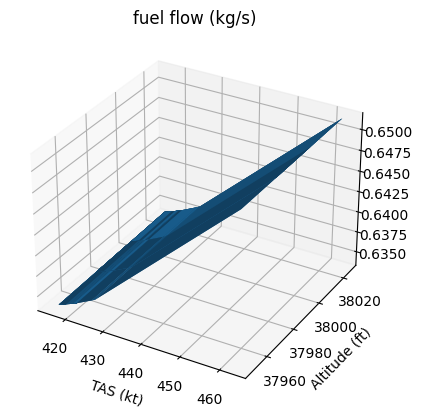

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from openap import Emission, FuelFlow, prop
from mpl_toolkits.mplot3d import Axes3D



list_type = data_new_na.type_avion
list_tas = data_new_na.TAS
list_alt = data_new_na.altitude

ac = list_type[5]

aircraft = prop.aircraft(ac)
fuelflow = FuelFlow(ac=ac)
emission = Emission(ac=ac)


tas = ast.literal_eval(list_tas[5])
alt = ast.literal_eval(list_alt[5])
tas_, alt_ = np.meshgrid(tas, alt)
mass = aircraft["limits"]["MTOW"] * 0.85


ff = fuelflow.enroute(mass=mass, tas=tas_, alt=alt_, path_angle=0)

co2 = emission.co2(ff)
h2o = emission.h2o(ff)
sox = emission.sox(ff)
nox = emission.nox(ff, tas=tas_, alt=alt_)
co = emission.co(ff, tas=tas_, alt=alt_)
hc = emission.hc(ff, tas=tas_, alt=alt_)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(tas_, alt_, ff)
plt.title("fuel flow (kg/s)")
plt.xlabel("TAS (kt)")
plt.ylabel("Altitude (ft)")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from openap import Emission, FuelFlow, prop
from mpl_toolkits.mplot3d import Axes3D

def indicateurs_env(ac, tas, alt) : 
        
    aircraft = prop.aircraft(ac)
    fuelflow = FuelFlow(ac=ac)
    emission = Emission(ac=ac)

    tas_, alt_ = np.meshgrid(tas, alt)
    mass = aircraft["limits"]["MTOW"] * 0.85


    ff = fuelflow.enroute(mass=mass, tas=tas_, alt=alt_, path_angle=0)

    co2 = emission.co2(ff)
    h2o = emission.h2o(ff)
    sox = emission.sox(ff)
    nox = emission.nox(ff, tas=tas_, alt=alt_)
    co = emission.co(ff, tas=tas_, alt=alt_)
    hc = emission.hc(ff, tas=tas_, alt=alt_)

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, ff)
    plt.title("fuel flow (kg/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, h2o)
    plt.title("H2O (g/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, co2)
    plt.title("CO2 (kg/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, sox)
    plt.title("SOx (g/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, nox)
    plt.title("NOx (g/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, co)
    plt.title("CO (g/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    surf = ax.plot_surface(tas_, alt_, hc)
    plt.title("HC (g/s)")
    plt.xlabel("TAS (kt)")
    plt.ylabel("Altitude (ft)")
    plt.show()

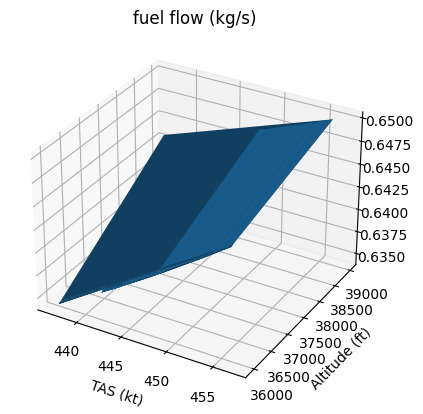

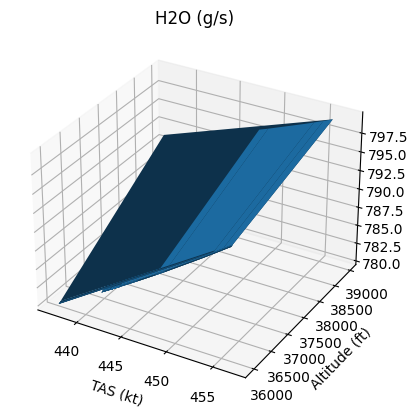

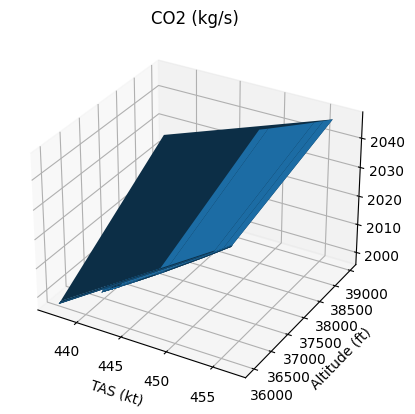

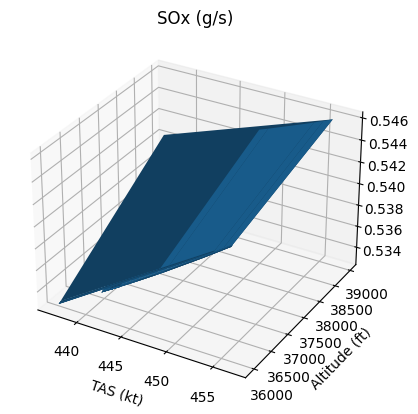

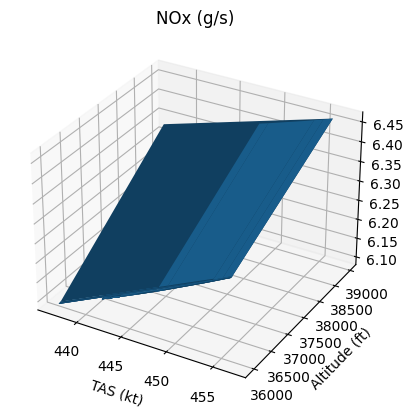

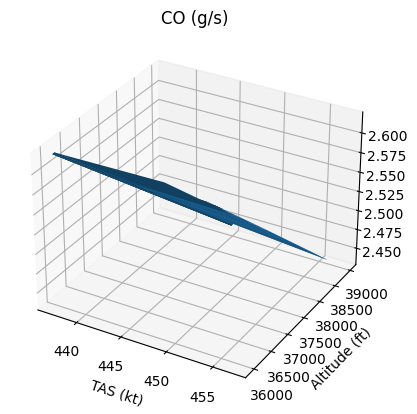

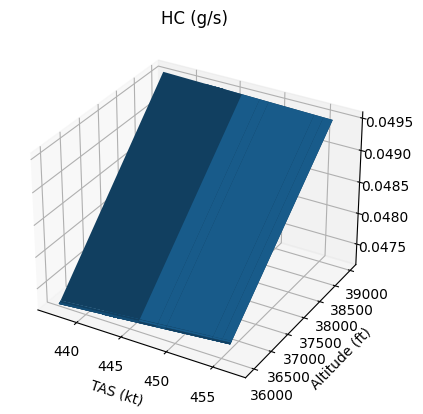

In [ ]:
list_type = data_new_na.type_avion
list_tas = data_new_na.TAS
list_alt = data_new_na.altitude

ac = list_type[5]

aircraft = prop.aircraft(ac)
fuelflow = FuelFlow(ac=ac)
emission = Emission(ac=ac)


tas = ast.literal_eval(list_tas[5])
alt = ast.literal_eval(list_alt[5])

indicateurs_env(ac, tas, alt)